# Covid data analysis 
Source: https://www.saopaulo.sp.gov.br/planosp/simi/dados-abertos/

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
import os
from joblib import dump, load
import numpy as np

In [2]:
source = pd.read_csv('./data.csv', sep = ';')
columns = ['Genero', 'Diagnostico Covid19', 'Idade', 'Obito']
df = source[columns]

In [3]:
display(source)

,Genero,Municipio,Asma,Diabetes,Cardiopatia,Doenca Hematologica,Doenca Hepatica,Doenca Neurologica,Doenca Renal,Imunodepressao,Obesidade,Pneumopatia,Puérpera,Síndrome De Down,Outros Fatores De Risco,Diagnostico Covid19,Data Inicio Sintomas,Idade,Obito
0,MASCULINO,POTIM,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO,21/03/2021,44.0,0
1,FEMININO,POTIM,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO,22/03/2021,66.0,0
2,MASCULINO,POTIM,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO,22/03/2021,0.0,0
3,MASCULINO,POTIM,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO,22/03/2021,22.0,0
4,FEMININO,POTIM,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO,22/03/2021,25.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5045446,FEMININO,TAUBATÉ,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO,05/05/2021,59.0,0
5045447,MASCULINO,TAUBATÉ,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO,05/05/2021,38.0,0
5045448,FEMININO,TAUBATÉ,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO,05/05/2021,36.0,0
5045449,FEMININO,TAUBATÉ,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO,05/05/2021,20.0,0


In [4]:
display(df)

,Genero,Diagnostico Covid19,Idade,Obito
0,MASCULINO,CONFIRMADO,44.0,0
1,FEMININO,CONFIRMADO,66.0,0
2,MASCULINO,CONFIRMADO,0.0,0
3,MASCULINO,CONFIRMADO,22.0,0
4,FEMININO,CONFIRMADO,25.0,0
...,...,...,...,...
5045446,FEMININO,CONFIRMADO,59.0,0
5045447,MASCULINO,CONFIRMADO,38.0,0
5045448,FEMININO,CONFIRMADO,36.0,0
5045449,FEMININO,CONFIRMADO,20.0,0


In [5]:
df = df.dropna(how="any", axis=0)

In [6]:
masc_total = df[(df['Genero'] == 'MASCULINO') & (df['Diagnostico Covid19'] == 'CONFIRMADO')].shape[0]
fem_total = df[(df['Genero'] == 'FEMININO') & (df['Diagnostico Covid19'] == 'CONFIRMADO')].shape[0]
ni = df[(df['Genero'] != 'FEMININO') & (df['Genero'] != 'MASCULINO') & (df['Diagnostico Covid19'] == 'CONFIRMADO')].shape[0]
total = df[df['Diagnostico Covid19'] == 'CONFIRMADO'].shape[0]
masc = masc_total/total
fem = fem_total/total
ni_ = ni/total

In [7]:
font_title = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 12,
        }

font_label = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }

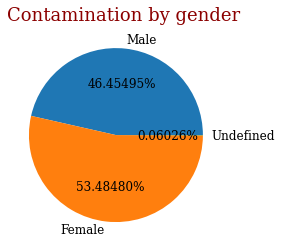

In [8]:
fig, ax = plt.subplots()
plt.style.use('ggplot')
ax.pie([masc_total, fem_total, ni], labels = ['Male', 'Female', 'Undefined'], autopct = '%1.5f%%', normalize = True, textprops = font_label)
plt.title('Contamination by gender', loc = 'left', fontsize = 18, fontdict = font_title)
plt.show()

# Mortality

In [9]:
df.Idade = df.Idade.astype(int)

In [10]:
y = []

for i in range(0, 140, 10):
    count_obitos = 0
    for j in range(i, i+10):
        count_obitos += df[(df.Idade == j) & (df.Obito == 1)].shape[0]
    mortalidade = count_obitos/df.shape[0]
    y.append(mortalidade * 100)

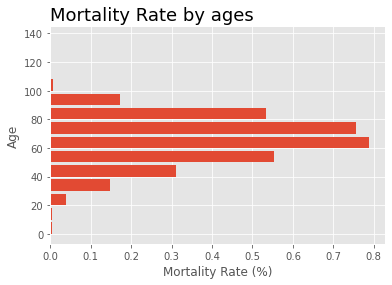

In [11]:
fig, ax = plt.subplots()

plt.style.use('ggplot')
ax.barh(range(0, 140, 10), y, height = 8, align = 'edge')
ax.set_ylabel('Age')
ax.set_xlabel('Mortality Rate (%)')
plt.title('Mortality Rate by ages', loc = 'left', fontsize = 18)

plt.show()

# ML Model to predict death chance

In [12]:
data = source
data = data.drop('Outros Fatores De Risco', axis = 1)
data = data.drop('Data Inicio Sintomas', axis = 1)
data = data.drop('Municipio', axis = 1)

In [13]:
data['Asma'] = data['Asma'].map({'SIM':1 ,'NÃO':0, 'IGNORADO':0})
data['Diabetes'] = data['Diabetes'].map({'SIM':1 ,'NÃO':0, 'IGNORADO':0})
data['Cardiopatia'] = data['Cardiopatia'].map({'SIM':1 ,'NÃO':0, 'IGNORADO':0})
data['Doenca Hematologica'] = data['Doenca Hematologica'].map({'SIM':1 ,'NÃO':0, 'IGNORADO':0})
data['Doenca Hepatica'] = data['Doenca Hepatica'].map({'SIM':1 ,'NÃO':0, 'IGNORADO':0})
data['Doenca Neurologica'] = data['Doenca Neurologica'].map({'SIM':1 ,'NÃO':0, 'IGNORADO':0})
data['Doenca Renal'] = data['Doenca Renal'].map({'SIM':1 ,'NÃO':0, 'IGNORADO':0})
data['Obesidade'] = data['Obesidade'].map({'SIM':1 ,'NÃO':0, 'IGNORADO':0})
data['Imunodepressao'] = data['Imunodepressao'].map({'SIM':1 ,'NÃO':0, 'IGNORADO':0})
data['Pneumopatia'] = data['Pneumopatia'].map({'SIM':1 ,'NÃO':0, 'IGNORADO':0})
data['Puérpera'] = data['Puérpera'].map({'SIM':1 ,'NÃO':0, 'IGNORADO':0})
data['Síndrome De Down'] = data['Síndrome De Down'].map({'SIM':1 ,'NÃO':0, 'IGNORADO':0})
data['Diagnostico Covid19'] = data['Diagnostico Covid19'].map({'CONFIRMADO':1})
data['Genero'] = data['Genero'].map({'MASCULINO':1 ,'NÃO':0, 'FEMININO':0})

In [14]:
data = data.dropna(how="any", axis=0)

In [15]:
data.columns[data.isna().any()]

Index([], dtype='object')

In [16]:
target = data['Obito']
data = data.drop('Obito', axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.3)

In [24]:
clf = svm.SVC()

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
pred = clf.predict(X_test)

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, pred))
print("F1 Score:", metrics.f1_score(y_test, pred))
print("Recall:", metrics.precision_score(y_test, pred))
print("Precision:", metrics.recall_score(y_test, pred))

In [ ]:
import pickle

#
# Create your model here (same as above)
#

# Save to file in the current working directory
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)